In [2]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.dropna(inplace = True)

In [7]:
print(data)

            FedFunds  Unemployment  HousingStarts  Inflation
1959-01-01      2.48           6.0         1657.0     29.010
1959-02-01      2.43           5.9         1667.0     29.000
1959-03-01      2.80           5.6         1620.0     28.970
1959-04-01      2.96           5.2         1590.0     28.980
1959-05-01      2.90           5.1         1498.0     29.040
...              ...           ...            ...        ...
2023-07-01      5.12           3.5         1451.0    304.348
2023-08-01      5.33           3.8         1305.0    306.269
2023-09-01      5.33           3.8         1356.0    307.481
2023-10-01      5.33           3.8         1359.0    307.619
2023-11-01      5.33           3.7         1560.0    307.917

[779 rows x 4 columns]


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [12]:
split1 = int(len(data)*.6)
split2 = int(len(data)*.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [11]:
data_in.iloc[0:10,1:3]

,Unemployment,HousingStarts
1959-01-01,6.0,1657.0
1959-02-01,5.9,1667.0
1959-03-01,5.6,1620.0
1959-04-01,5.2,1590.0
1959-05-01,5.1,1498.0
1959-06-01,5.0,1503.0
1959-07-01,5.1,1547.0
1959-08-01,5.2,1430.0
1959-09-01,5.5,1540.0
1959-10-01,5.7,1355.0


In [14]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [ ]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [23]:
model1 = sm.OLS(y_in,X_in).fit()

# 4.) Recreate the graph fro your model

In [17]:
import matplotlib.pyplot as plt

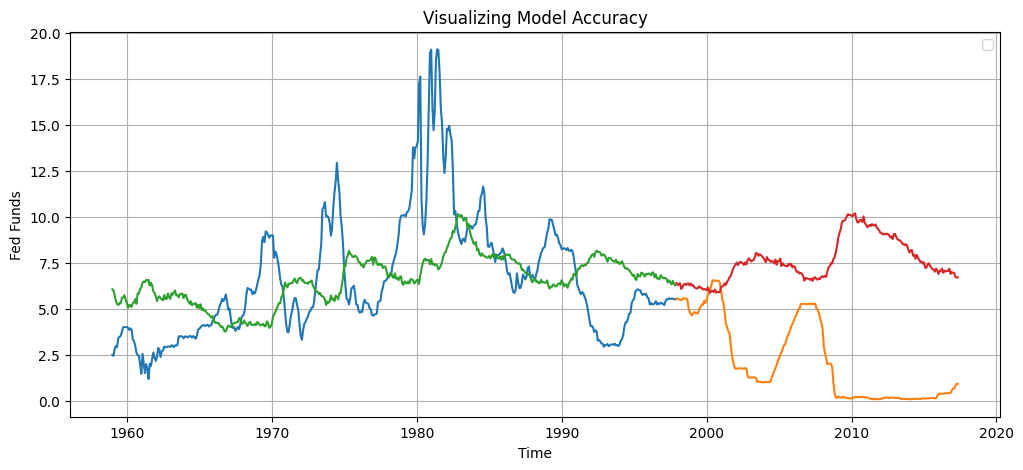

In [26]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [27]:
from sklearn.metrics import mean_squared_error

In [29]:
in_mse_1 = mean_squared_error(y_in,model1.predict(X_in) )
out_mse_1 = mean_squared_error(y_out,model1.predict(X_out))

In [30]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.342261026777946
Outsample MSE :  39.8622093480945


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
max_degrees = 3

In [40]:
for degrees in range(1,1+max_degrees):
    print('DEGREES:', degrees)
    
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    #Q3
    model1 = sm.OLS(y_in,X_in_poly).fit()
    
    #Q4
    plt.figure(figsize=(12,5))
    
    in_preds = model1_predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds,index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds,index = y_out.index)




DEGREES: 1
DEGREES: 2
DEGREES: 3


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

DEGREES:  1


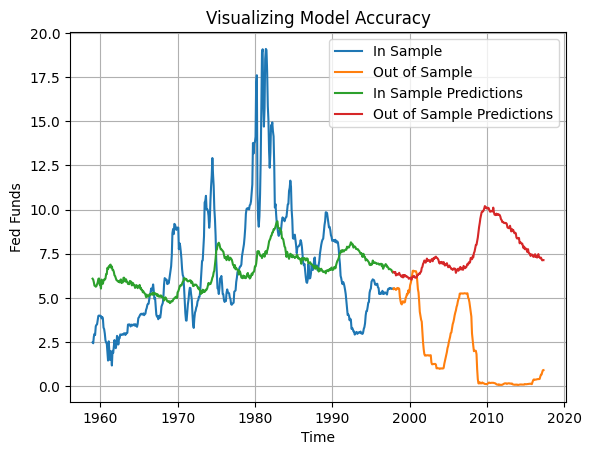

Insample MSE: 10.071422013168641
Outsample MSE: 40.360827835668516
DEGREES:  2


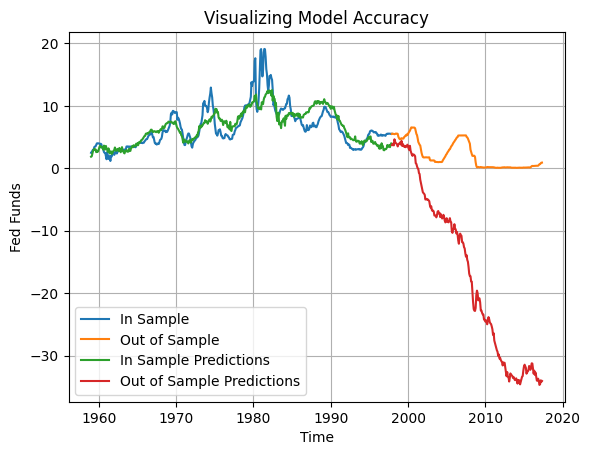

Insample MSE: 3.863477139276067
Outsample MSE: 481.4465099449595
DEGREES:  3


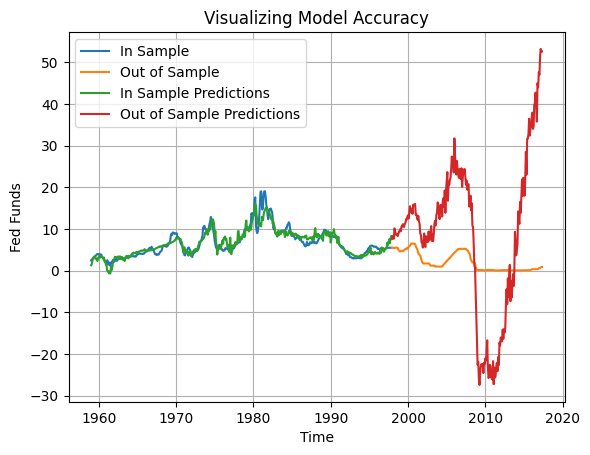

Insample MSE: 1.8723636265932586
Outsample MSE: 371.768123590037


In [47]:
for degree in range(1, 1+max_degrees):
    print("DEGREES: ", degree)
    poly = PolynomialFeatures(degree = degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out) 

    # Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()

    # Q4
    plt.figure

    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)

    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In Sample", "Out of Sample", "In Sample Predictions", "Out of Sample Predictions"])
    plt.grid()
    plt.show()
    
    #q5
    in_mse_1 = mean_squared_error(y_in,model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out,model1.predict(X_out_poly))
    print('Insample MSE:',in_mse_1)
    print('Outsample MSE:',out_mse_1)

# 7.) State your observations :

${\alpha}^2$

#### 1. The insample MSE is decreasing with the polynomial degree increase.
#### 2. The outsample MSE is increasing with degree changing from 1 to 2, and then it is decreasing with degree changing from 2 to 3.
#### 3. Models with greater degrees have a smaller bias (overfitting), according to the non-increasing insample MSE.
#### 4. Models with greater degrees have a greater variance.